# Lab2- Explanability IA 

In [1]:
import pandas as pd 
import numpy as np 


In [2]:
data = pd.read_csv("C:/Users/user/OneDrive - De Vinci/Desktop/semestre 8/explain ia/td2/archive/NY-House-Dataset.csv")

In [3]:
data.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [4]:
data.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.801000e+03,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000
mean,2.356940e+06,3.356801,2.373861,2184.207862,40.714227,-73.941601
std,3.135525e+07,2.602315,1.946962,2377.140894,0.087676,0.101082
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033
25%,4.990000e+05,2.000000,1.000000,1200.000000,40.639375,-73.987143
50%,8.250000e+05,3.000000,2.000000,2184.207862,40.726749,-73.949189
75%,1.495000e+06,4.000000,3.000000,2184.207862,40.771923,-73.870638
max,2.147484e+09,50.000000,50.000000,65535.000000,40.912729,-73.702450


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

###### • How many apartments are there?


In [7]:
nber_appart=data[data['TYPE'].isin(['Condo for sale'])].shape[0]

print("There is:", nber_appart,"Appartment")

There is: 891 Appartment


• What are the characteristics of the most expensive apartment?

In [9]:
prix_app=data['PRICE'].idxmax()
most_expensive_appart=data.loc[prix_app]
print('The characteristics of the most expensive apartent is: ')
print()
print(most_expensive_appart)

The characteristics of the most expensive apartent is: 

BROKERTITLE                              Brokered by ANNE LOPA REAL ESTATE
TYPE                                                        House for sale
PRICE                                                           2147483647
BEDS                                                                     7
BATH                                                                   6.0
PROPERTYSQFT                                                       10000.0
ADDRESS                                                 6659-6675 Amboy Rd
STATE                                                   New York, NY 10309
MAIN_ADDRESS                          6659-6675 Amboy RdNew York, NY 10309
ADMINISTRATIVE_AREA_LEVEL_2                                  United States
LOCALITY                                                          New York
SUBLOCALITY                                                Richmond County
STREET_NAME                                

###### • Transform the size of the apartment to m2. Which are more expensive per square meters, big apartments or small apartments?

In [14]:
data['size_m2'] = data['PROPERTYSQFT'] * 0.092903  # Conversion 1 pied carré = 0.092903 m²

# Calculer le prix par mètre carré
data['PRICE_m2'] = data['PRICE'] / data['size_m2']
seuil=100
# Comparer les prix par mètre carré entre les grands et petits appartements
price_by_m2_big_aparts = data[data['size_m2'] > seuil]['PRICE_m2'].mean()
price_by_m2_small_aparts = data[data['size_m2'] <= seuil]['PRICE_m2'].mean()

In [15]:
print("Price by M2  for a big apartments : ",price_by_m2_big_aparts)
print("Price by M2  for a small apartments : ",price_by_m2_small_aparts)

Price by M2  for a big apartments :  9268.877574842623
Price by M2  for a small apartments :  7291.664303150909


### Small Apartments:

##### Average price per square meter:  $7291.66430315090
This suggests that, on average, smaller apartments (with a size less than or equal to 100 square meters) have a price of around $527,895 per square meter.
Big Apartments:

###### Average price per square meter:  $9268.877574842623
This suggests that, on average, larger apartments (with a size greater than 100 square meters) have a significantly higher price of around $2,835,106 per square meter.

###### • what is the distribution of the prices for the main brokers? Can you find luxury brokers?

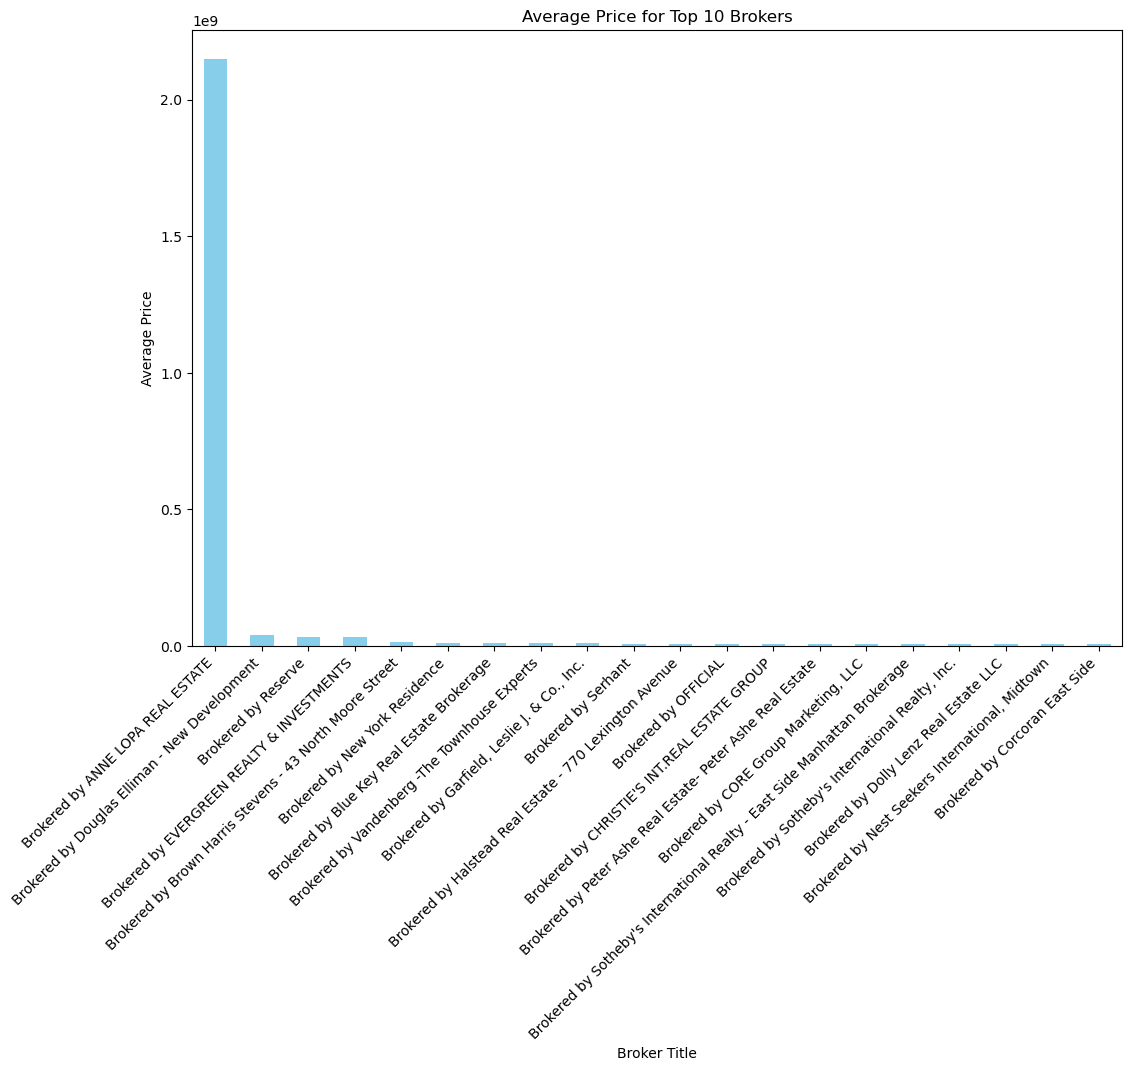

Luxury Brokers:
BROKERTITLE
Brokered by ANNE LOPA REAL ESTATE                           2.147484e+09
Brokered by Douglas Elliman - New Development               4.000000e+07
Brokered by Reserve                                         3.200000e+07
Brokered by EVERGREEN REALTY & INVESTMENTS                  3.150000e+07
Brokered by Brown Harris Stevens - 43 North Moore Street    1.554633e+07
Name: PRICE, dtype: float64


In [16]:
import matplotlib.pyplot as plt

# Get the top 10 brokers based on mean price
top_brokers = data.groupby('BROKERTITLE')['PRICE'].mean().sort_values(ascending=False).head(20)

# Plotting the bar plot for the top 10 brokers
plt.figure(figsize=(12, 8))
top_brokers.plot(kind='bar', color='skyblue')
plt.title('Average Price for Top 10 Brokers')
plt.xlabel('Broker Title')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.show()

# Identify luxury brokers based on the mean price
top2_brokers = data.groupby('BROKERTITLE')['PRICE'].mean().sort_values(ascending=False).head(5)
print("Luxury Brokers:")
print(top2_brokers)


###### • what is the most expensive area? the cheapest?


In [18]:
most_expensive_area = data.groupby('LOCALITY')['PRICE'].mean().idxmax()
cheapest_area = data.groupby('LOCALITY')['PRICE'].mean().idxmin()

print("Most Expensive Area:", most_expensive_area)
print("Cheapest Area:", cheapest_area)



Most Expensive Area: New York
Cheapest Area: The Bronx


###### • what area has the most variance in prices? and in price per square meter?


In [20]:
variance_prices_area = data.groupby('LOCALITY')['PRICE'].var().idxmax()
variance_price_per_m2_area = data.groupby('LOCALITY')['PRICE_m2'].var().idxmax()

print("Area with Most Variance in Prices:", variance_prices_area)
print("Area with Most Variance in Price per Square Meter:", variance_price_per_m2_area)


Area with Most Variance in Prices: New York
Area with Most Variance in Price per Square Meter: New York


# Question 2.
Make a few plots to illustrate the previous questions and deepen your knowlege of the dataset

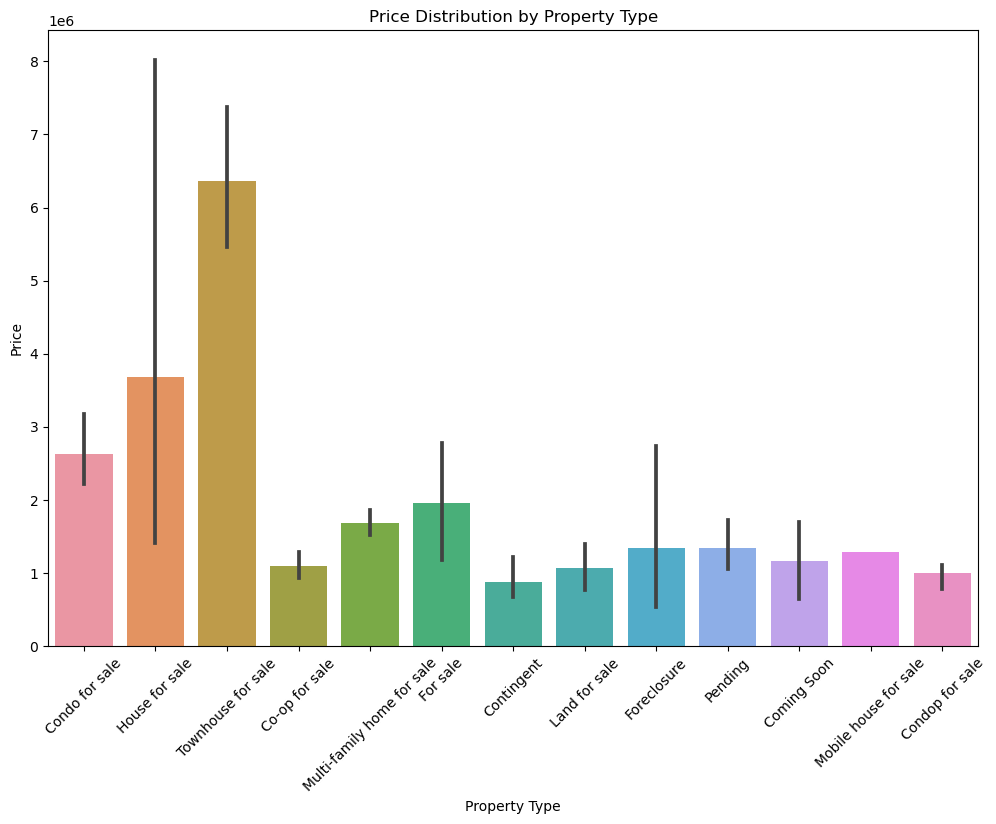

In [23]:
import seaborn as sns
# Boxplot of price by type
plt.figure(figsize=(12, 8))
sns.barplot(x='TYPE', y='PRICE', data=data)
plt.title('Price Distribution by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

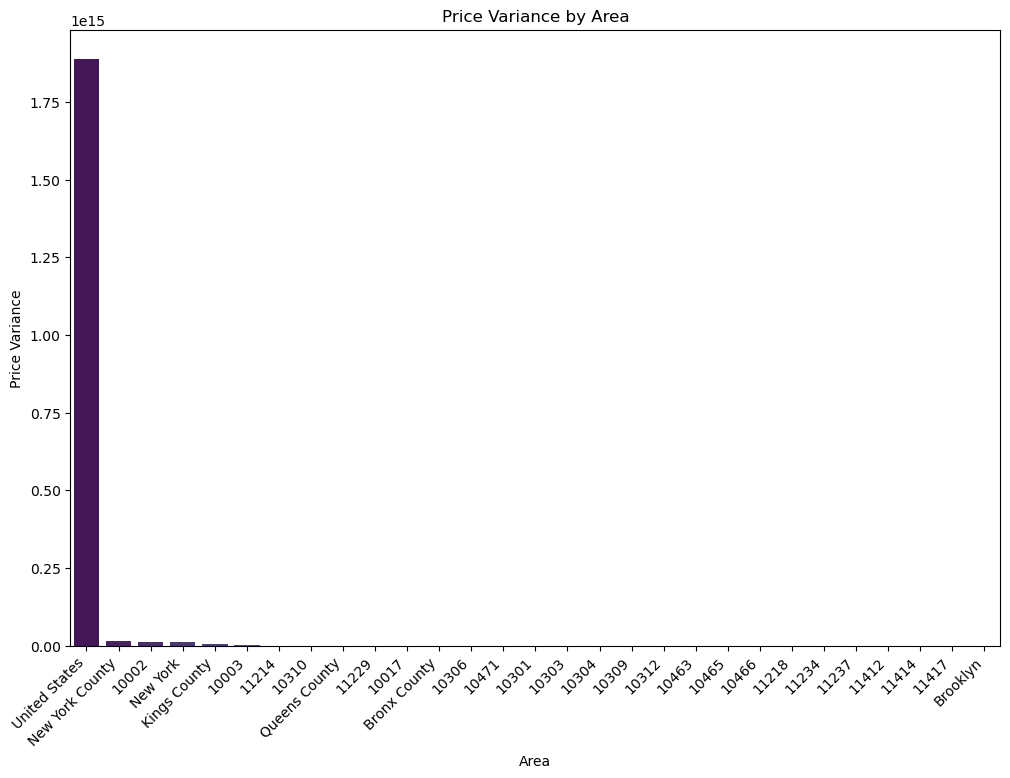

In [30]:
plt.figure(figsize=(12, 8))
price_variance_by_area = data.groupby('ADMINISTRATIVE_AREA_LEVEL_2')['PRICE'].var().sort_values(ascending=False)
sns.barplot(x=price_variance_by_area.index, y=price_variance_by_area.values, palette='viridis')
plt.title('Price Variance by Area')
plt.xlabel('Area')
plt.ylabel('Price Variance')
plt.xticks(rotation=45, ha='right')
plt.show()

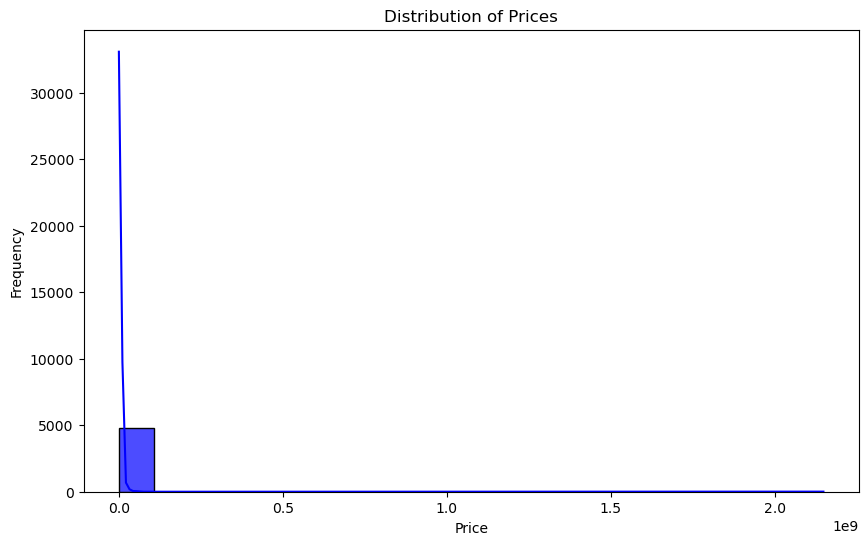

In [33]:
# Visualize distribution of prices
plt.figure(figsize=(10, 6))
sns.histplot(data['PRICE'], bins=20, kde=True, color='blue', alpha=0.7)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


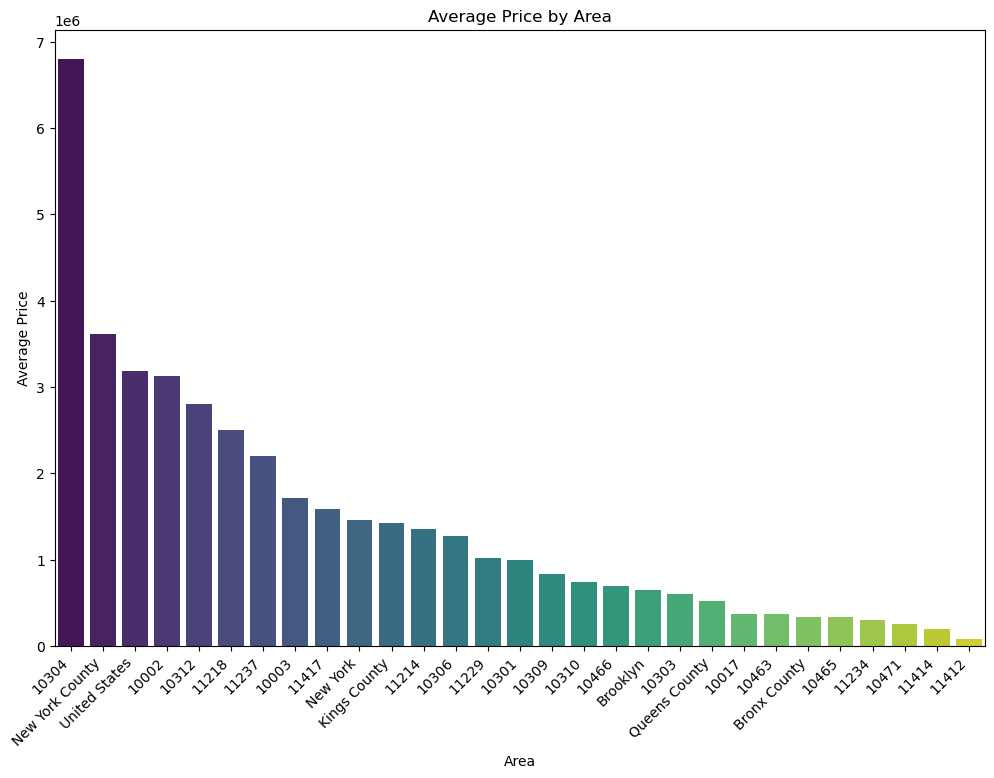

In [37]:
plt.figure(figsize=(12, 8))
average_price_by_area = data.groupby('ADMINISTRATIVE_AREA_LEVEL_2')['PRICE'].mean().sort_values(ascending=False)
sns.barplot(x=average_price_by_area.index, y=average_price_by_area.values, palette='viridis')
plt.title('Average Price by Area')
plt.xlabel('Area')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.show()

# Question 3.
We are going to do a quick linear regression.
• Select the variables that are the most likely to have an effect
• Do one hot encoding to categorical variables, and select their base.
• with scikit learn, use the linear regressor to predict the price of the apartment.
• use .coef_ and .intercept_ to access the parameters of the model. What can you say about them?
• Transform the price with the log, fit your new model and interpret the parameters

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

###### Variable Selection:

In [43]:
# Adjust selected features to include the encoded 'TYPE' columns
selected_features = ['PROPERTYSQFT', 'BEDS', 'BATH', 'TYPE_Coming Soon', 'TYPE_Condo for sale', 'TYPE_Condop for sale', 'TYPE_Contingent', 'TYPE_For sale', 'TYPE_Foreclosure', 'TYPE_House for sale', 'TYPE_Land for sale', 'TYPE_Mobile house for sale', 'TYPE_Multi-family home for sale', 'TYPE_Pending', 'TYPE_Townhouse for sale']



###### One-Hot Encoding:

In [ ]:
# Select features and target variable
data_encoded = pd.get_dummies(data, columns=['TYPE'], drop_first=True)
X = data_encoded[selected_features]
y = data_encoded['PRICE']

###### Model Fitting:

In [44]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

###### Coefficient and Intercept Explanation:

In [48]:
# Coefficients and intercept for the original model
print("\nLinear Regression Coefficients:", lr_model.coef_)
print("Linear Regression Intercept:", lr_model.intercept_)




Linear Regression Coefficients: [ 1.35096187e+03 -8.78984814e+04  7.84044550e+05 -2.16535014e+06
  1.31940478e+06 -5.93406188e+05 -7.47918757e+05 -5.54524773e+04
 -1.00587523e+06  1.63628741e+06 -1.22024968e+06 -1.35055318e+06
 -3.16827062e+06 -8.60408729e+05  4.23694833e+05]
Linear Regression Intercept: -2136971.118302816


#### Linear Regression Coefficients:
The coefficients represent the change in price associated with a one-unit change in the corresponding feature, holding other features constant.

Example:
- A one-unit increase in 'PROPERTYSQFT' is associated with an increase in price by approximately $1,350.96.
- A one-unit increase in 'BEDS' is associated with a decrease in price by approximately $87,898.48.
- A one-unit increase in 'BATH' is associated with an increase in price by approximately $784,044.55.

The intercept is approximately -$2,136,971.12.

###### Log Transformation:

In [47]:
# Transform the price with log
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

# Fit linear regression model with log-transformed price
lr_model_log = LinearRegression()
lr_model_log.fit(X_train, y_train_log)

# Coefficients and intercept for log-transformed model
print("\nLog-Transformed Linear Regression Coefficients:", lr_model_log.coef_)
print("Log-Transformed Linear Regression Intercept:", lr_model_log.intercept_)



Log-Transformed Linear Regression Coefficients: [ 9.64674171e-05 -7.75846121e-03  1.82765945e-01 -1.23083373e-01
  7.11972403e-01  6.84238467e-01  8.21261192e-02  1.75842465e-01
  1.15351343e-01  4.07627754e-01 -7.71225283e-02  5.77846739e-01
  3.08500495e-01  3.16358777e-01  1.12547496e+00]
Log-Transformed Linear Regression Intercept: 12.778302487804241


#### Log-Transformed Linear Regression Coefficients:
The coefficients represent the percentage change in price associated with a one-unit change in the corresponding feature, holding other features constant.

Example:
- A one-unit increase in 'PROPERTYSQFT' is associated with an increase in price by approximately 0.0096%.
- A one-unit increase in 'BEDS' is associated with a decrease in price by approximately 0.776%.
- A one-unit increase in 'BATH' is associated with an increase in price by approximately 18.28%.

The intercept is approximately 12.78.

# Question4

In [50]:
from sklearn.tree import DecisionTreeRegressor, export_text, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [51]:
# Create and fit decision tree model
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)


DecisionTreeRegressor()

######  Visualize the decision tree graphically

In [59]:
tree_rules = export_text(tree_model, feature_names=X_train.columns)
print("Decision Tree Rules:")
print(tree_rules)


Decision Tree Rules:
|--- PROPERTYSQFT <= 9777.50
|   |--- PROPERTYSQFT <= 3990.00
|   |   |--- BATH <= 2.19
|   |   |   |--- BATH <= 1.50
|   |   |   |   |--- BATH <= 0.50
|   |   |   |   |   |--- value: [14995000.00]
|   |   |   |   |--- BATH >  0.50
|   |   |   |   |   |--- PROPERTYSQFT <= 2372.10
|   |   |   |   |   |   |--- TYPE_Condo for sale <= 0.50
|   |   |   |   |   |   |   |--- PROPERTYSQFT <= 932.50
|   |   |   |   |   |   |   |   |--- TYPE_For sale <= 0.50
|   |   |   |   |   |   |   |   |   |--- PROPERTYSQFT <= 678.50
|   |   |   |   |   |   |   |   |   |   |--- TYPE_Multi-family home for sale <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 15
|   |   |   |   |   |   |   |   |   |   |--- TYPE_Multi-family home for sale >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- value: [750000.00]
|   |   |   |   |   |   |   |   |   |--- PROPERTYSQFT >  678.50
|   |   |   |   |   |   |   |   |   |   |--- TYPE_Pending <= 0.50
|   |   |   |   

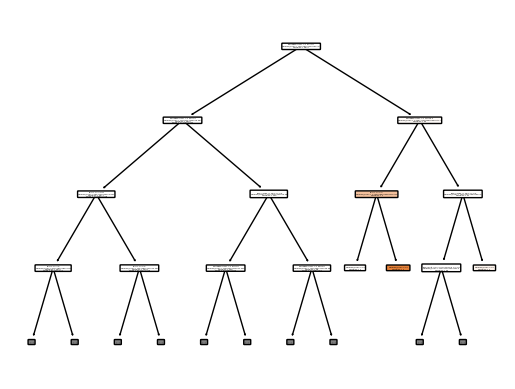

In [58]:
# Visualize the decision tree graphically
plot_tree(tree_model, feature_names=X_train.columns, filled=True, rounded=True, max_depth=3)
plt.show()



In [54]:
# Hyperparameter tuning for decision tree
param_grid = {'max_depth': [3, 5, 7, 10]}
grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 5, 7, 10]})

###### Access best hyperparameter

In [55]:
# Access best hyperparameters
best_tree_model = grid_search.best_estimator_
best_tree_params = grid_search.best_params_

print("Best Decision Tree Hyperparameters:", best_tree_params)

Best Decision Tree Hyperparameters: {'max_depth': 5}


###### Evaluate and compare models on the test set

In [56]:
# Evaluate and compare models on the test set
y_pred_lr = lr_model.predict(X_test)
y_pred_tree = best_tree_model.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_tree = mean_squared_error(y_test, y_pred_tree)

print("Mean Squared Error - Linear Regression:", mse_lr)
print("Mean Squared Error - Decision Tree:", mse_tree)

Mean Squared Error - Linear Regression: 19923575402362.06
Mean Squared Error - Decision Tree: 12673440985580.91


###### Comment on which model yields better results

In [60]:
# Comment on which model yields better results
if mse_lr < mse_tree:
    print("Linear Regression performs better.")
else:
    print("Decision Tree performs better.")

Decision Tree performs better.


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# Create linear regression model
lr_model = LinearRegression()

# Fit linear regression model
lr_model.fit(X_train, y_train)

# Evaluate linear regression model using cross-validation
lr_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
lr_mse = -lr_scores.mean()

# Create decision tree model with best hyperparameters
best_tree_model = DecisionTreeRegressor(max_depth=7)

# Fit decision tree model
best_tree_model.fit(X_train, y_train)

# Evaluate decision tree model using cross-validation
tree_scores = cross_val_score(best_tree_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
tree_mse = -tree_scores.mean()

# Print mean squared error for both models
print("Linear Regression Mean Squared Error:", lr_mse)
print("Decision Tree Mean Squared Error:", tree_mse)

# Compare mean squared error to determine which model performs better
if lr_mse < tree_mse:
    print("Linear regression model performs better.")
elif lr_mse > tree_mse:
    print("Decision tree model performs better.")
else:
    print("Both models have similar performance.")


# Question 5.
We are going to use a random forest algorithm now.
• Use the scikitlearn library and fit a random forest on a training set.
• Which model yields better results? ( don’t forget to tune the hyperparameters)
• look at the variable weights. Which variables are more important? How can you interpret that?

In [68]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

###### Create and fit random forest model

In [63]:
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)


Best Random Forest Hyperparameters: {'max_depth': 5, 'n_estimators': 50}


###### Hyperparameter tuning for random forest

In [ ]:
param_grid_forest = {'n_estimators': [50, 100, 150], 'max_depth': [None, 5, 10]}
grid_search_forest = GridSearchCV(RandomForestRegressor(), param_grid_forest, cv=5)
grid_search_forest.fit(X_train, y_train)

###### Access best hyperparameters

In [69]:
best_forest_model = grid_search_forest.best_estimator_
best_forest_params = grid_search_forest.best_params_

print("Best Random Forest Hyperparameters:", best_forest_params)

Best Random Forest Hyperparameters: {'max_depth': 5, 'n_estimators': 50}


In [70]:

# Evaluate linear regression model on test set
lr_test_predictions = lr_model.predict(X_test)
lr_test_mse = mean_squared_error(y_test, lr_test_predictions)

# Evaluate decision tree model on test set
tree_test_predictions = best_tree_model.predict(X_test)
tree_test_mse = mean_squared_error(y_test, tree_test_predictions)

# Evaluate random forest model on test set
forest_test_predictions = best_forest_model.predict(X_test)
forest_test_mse = mean_squared_error(y_test, forest_test_predictions)

# Print mean squared error for all models
print("Linear Regression Test Mean Squared Error:", lr_test_mse)
print("Decision Tree Test Mean Squared Error:", tree_test_mse)
print("Random Forest Test Mean Squared Error:", forest_test_mse)

# Compare mean squared error to determine which model performs better
if lr_test_mse < tree_test_mse and lr_test_mse < forest_test_mse:
    print("Linear regression model performs better on the test set.")
elif tree_test_mse < lr_test_mse and tree_test_mse < forest_test_mse:
    print("Decision tree model performs better on the test set.")
else:
    print("Random forest model performs better on the test set.")


Linear Regression Test Mean Squared Error: 19923575402362.06
Decision Tree Test Mean Squared Error: 12673440985580.91
Random Forest Test Mean Squared Error: 31054175498932.66
Decision tree model performs better on the test set.


In [71]:
feature_importances = best_forest_model.feature_importances_

# Create a DataFrame to display feature importances along with their names
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted DataFrame
print("Variable Importance in Random Forest Model:")
print(feature_importance_df)


Variable Importance in Random Forest Model:
                            Feature  Importance
0                      PROPERTYSQFT    0.595433
2                              BATH    0.194494
4               TYPE_Condo for sale    0.093375
1                              BEDS    0.079862
12  TYPE_Multi-family home for sale    0.018854
14          TYPE_Townhouse for sale    0.016039
9               TYPE_House for sale    0.001868
7                     TYPE_For sale    0.000075
3                  TYPE_Coming Soon    0.000000
5              TYPE_Condop for sale    0.000000
6                   TYPE_Contingent    0.000000
8                  TYPE_Foreclosure    0.000000
10               TYPE_Land for sale    0.000000
11       TYPE_Mobile house for sale    0.000000
13                     TYPE_Pending    0.000000


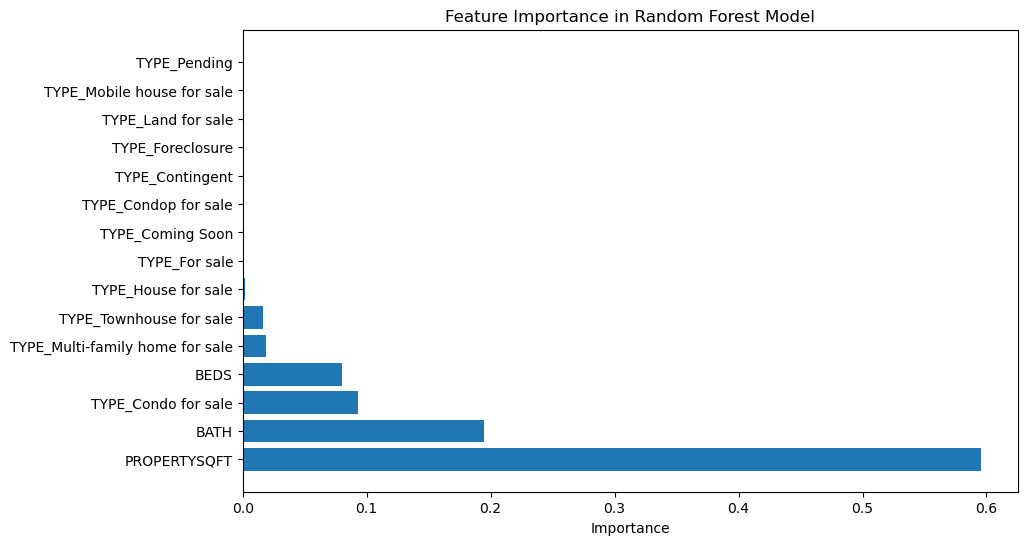

In [72]:
import matplotlib.pyplot as plt

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance in Random Forest Model')
plt.show()


#### Comment on Feature Importance:
The feature importance scores represent the relative contribution of each feature in predicting the target variable.
Higher values indicate features that have a more significant impact on the model's ability to make accurate predictions.


#### Comment on Model Performance Comparison:
Mean Squared Error (MSE) is utilized as the evaluation metric for model performance on the test set.
Lower MSE values are indicative of better model performance, showcasing how well the model predicts the target variable.


#### Visualize Feature Importance:
Creating a bar plot to visually represent the feature importances provides a clearer understanding of the relative significance
of each feature in the Random Forest model.